## UNIVERSIDAD POLITÉCNICA SALESIANA¶
## El VECINO - CUENCA

**Estudiante:** Gustavo Guallpa

**Profesor:** Ing. Diego Quisi

**Asignatura:** Simulación

**Fecha:** 09/12/2020.

**Tema:** Simulacion COVID-19.

## Práctica  Sympy 2

En base a la simulacion, generar una simulacion lo mas apegado a la realidad del Covid-19, para ello obtener informacion del numero de consultorios y camas disponibles del país seleccionado. Parametrizar la simulacion para ingresar el numero de pacientes, el numero de consultorios y el numero de camas y algun otro parametro que considere oportuno.

Finalmente generar las siguientes metricas :
- Tiempo de espera promedio para cada sala.
- Tiempo promedio total que requiere un paciente para ser atendido desde cero.
- Cuántos pacientes se atendieron.
- Cuántos pacientes se quedaron sin atender y fallecieron.


In [11]:
import simpy
import random
import matplotlib.pyplot as pp

% matplotlib inline

# Maximo de pacientes que puede recibir el negocio
MAX_PACIENTES = 57
# Total de camas.
NUM_CAMAS = 3
# Tiempo que tarda en atenderse un paciente (minutos)
TIEMPO_ATENCION = 15
# Intervalo de tiempo en que llegan pacientes (minutos)
INTERVALO_LLEGADA = 3
# Tiempo de simulación
TIEMPO_SIMULACION = 60

# Creamos un diccionario para almacenar las horas en que se atienden los pacientes.
tiempo = {}


class Consultorio(object):

    def __init__(self, environment, NUM_CAMAS, TIEMPO_ATENCION):
        # Guardamos como variable el entorno de ejecucion
        self.env = environment
        # Creamos el recurso que representa las camas
        self.camas = simpy.Resource(environment, NUM_CAMAS)
        # Variable para el tiempo de atencion.
        self.TIEMPO_ATENCION = TIEMPO_ATENCION

    def atender_paciente(self, paciente):
        # Este metodo representa el proceso de atencion al un cliente.
        # Se ingresa el paciente y se atiende.

        yield self.env.timeout(random.randint(TIEMPO_ATENCION - 5, TIEMPO_ATENCION + 5))

        print('Atendiedo  {%d%%} atención paciente => %s ' % (random.randint(30, 90), paciente))


def llegada_paciente(env, nombre, Consultorio):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el paciente con el nombre pasado como parametro
    print('Llega paciente: %s a la hora %.2f.' % (nombre, env.now))

    # Especificamos que vamos a usar un recurso (Resource) que representa
    with Consultorio.camas.request() as maquina:
        # Ocupamos la maquina de atencion.
        yield maquina
        # Indicamos que paciente entra a la Consultorio
        print('Entra paciente a atenderse: %s a la hora %.2f.' % (nombre, env.now))
        # Procesamos la operacion de atencion
        yield env.process(Consultorio.atender_paciente(nombre))
        # Una vez que termina la llamada con 'yield', se indica que se ha atendido al paciente.
        print('paciente [%s] lavado a las %.2f.' % (nombre, env.now))

        tiempo[nombre] = env.now


def ejecutar_simulacion(env, NUM_CAMAS, TIEMPO_ATENCION, intervalo):
    consultorio = Consultorio(env, NUM_CAMAS, TIEMPO_ATENCION)
    # Creamos 5 llegadas de pacientes iniciales
    for i in range(5):
        env.process(llegada_paciente(env, 'paciente-%d' % (i + 1), consultorio))

    # Ejecutamos la simulacion
    while True:
        yield env.timeout(random.randint(intervalo - 3, intervalo + 3))
        i += 1
        # Mientras se atiende a los pacientes generamos mas pacientes
        env.process(llegada_paciente(env, 'paciente-%d' % (i + 1), consultorio))


print('Consultorio UPS')

# Creamos el entorno de simulacion
env = simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_CAMAS, TIEMPO_ATENCION, INTERVALO_LLEGADA))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until=TIEMPO_SIMULACION)

print("Diccionario timepo :")
print(tiempo)

Consultorio UPS
Llega paciente: paciente-1 a la hora 0.00.
Llega paciente: paciente-2 a la hora 0.00.
Llega paciente: paciente-3 a la hora 0.00.
Llega paciente: paciente-4 a la hora 0.00.
Llega paciente: paciente-5 a la hora 0.00.
Entra paciente a atenderse: paciente-1 a la hora 0.00.
Entra paciente a atenderse: paciente-2 a la hora 0.00.
Entra paciente a atenderse: paciente-3 a la hora 0.00.
Llega paciente: paciente-6 a la hora 1.00.
Llega paciente: paciente-7 a la hora 3.00.
Llega paciente: paciente-8 a la hora 3.00.
Llega paciente: paciente-9 a la hora 3.00.
Llega paciente: paciente-10 a la hora 3.00.
Llega paciente: paciente-11 a la hora 4.00.
Llega paciente: paciente-12 a la hora 4.00.
Llega paciente: paciente-13 a la hora 5.00.
Llega paciente: paciente-14 a la hora 10.00.
Llega paciente: paciente-15 a la hora 15.00.
Atendiedo  {82%} atención paciente => paciente-3 
paciente [paciente-3] lavado a las 16.00.
Entra paciente a atenderse: paciente-4 a la hora 16.00.
Atendiedo  {44%} a

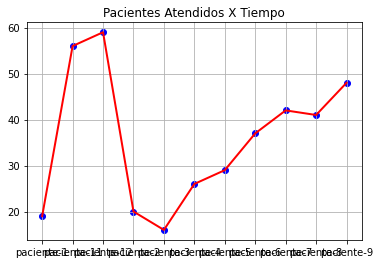

In [12]:
# Generamos la grafica
datos=sorted(tiempo.items()) # Ordenamos los datos
x, y =zip(*datos) # Obtener x(tiempo - clave) y el y(Numero de vehiculos atendidos - valor)
pp.plot(x,y,linewidth=2,color='red') #Dibujamos las lineas
pp.scatter(x,y,color='blue') # Dibujamos los puntos (x,y)
pp.title("Pacientes Atendidos X Tiempo")
pp.grid(True) #Generamos una cuadricula
pp.show() #Mostramos el grafico

## Referencias
[1] Matloff, N. (2008). Introduction to Discrete-Event Simulation and the SimPy Language.

[2] Team Simpy (2017). SimPy Documentation, Release 3.0.10, 2017. URL: https://media.readthedocs.org/pdf/simpy/latest/simpy.pdf 